# Perkenalan

Nama/Batch =  Sandika/008

# Import Pustaka

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout,Input
import tensorflow as tf
from tensorflow import keras
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras import initializers, optimizers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Data Loading

In [2]:
df_dummy= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df_dummy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


there is no columns with NaN value

In [5]:
df_dummy.shape

(7043, 21)

data frame consist of 7043 columns and 21 rows

# EDA

In [6]:
df = df_dummy.copy()

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.drop(['customerID'], axis=1, inplace=True)

kolom customerID dihapus karena tidak memiliki korelasi dengan Churn

In [9]:
df.Churn.value_counts()/len(df)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

the proportion of the data from the column churn is imbalance

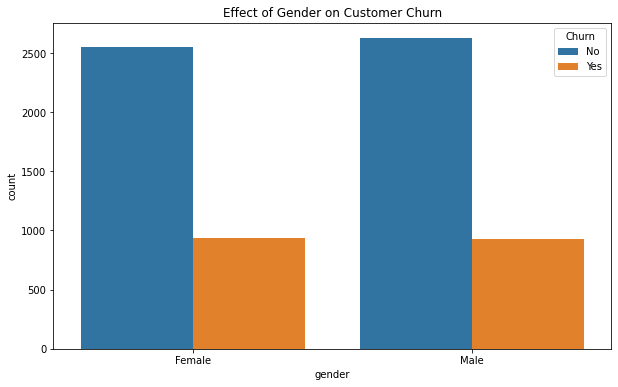

In [10]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'gender', hue='Churn', data=df)
ax.set_title(f'Effect of Gender on Customer Churn');

bisa dilihat dari hasil plot grafik bahwa jenis kelamin tidak berpengaruh terhadap Churn ration

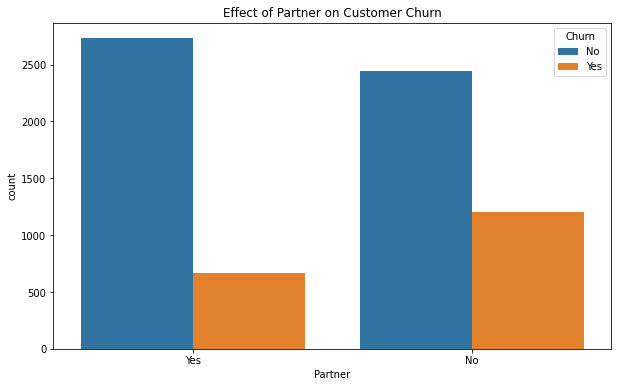

In [11]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'Partner', hue='Churn', data=df)
ax.set_title(f'Effect of Partner on Customer Churn');

Customer yang belum memiliki pasangan memiliki churn ratio yang lebih besar

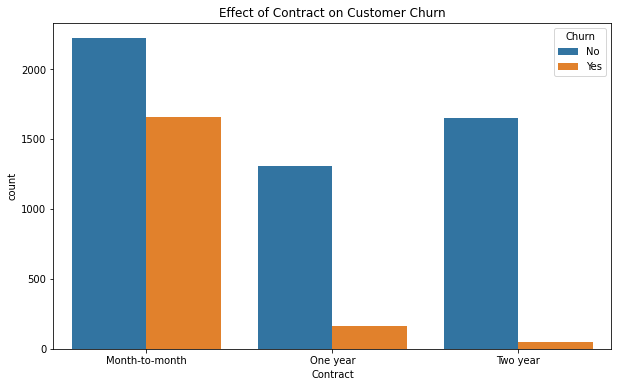

In [12]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'Contract', hue='Churn', data=df)
ax.set_title(f'Effect of Contract on Customer Churn');

semakin singkat kontrak yang dimiliki konsumen semakin tinggi juga Churn ratio nya

In [13]:
cat_col = df_dummy.select_dtypes(include=['object']).columns
num_col = df_dummy.select_dtypes(exclude=['object']).columns
print('Numeric Columns:', num_col)
print('categorical Columns:', cat_col)

Numeric Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')
categorical Columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


# Data Preprocessing

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


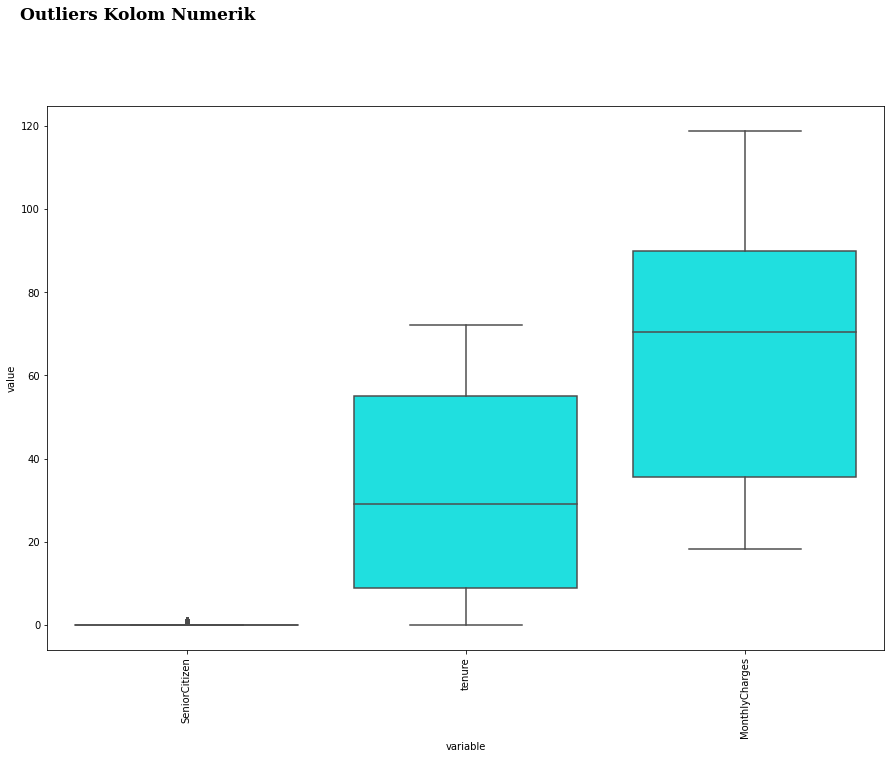

In [15]:
NumericData = df_dummy[[feature for feature in num_col if feature not in []]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Outliers Kolom Numerik", fontfamily='serif', fontsize=17, fontweight='bold')
bp = sns.boxplot(x='variable', y='value', data=NumericMelt, palette=['cyan']*len(num_col))
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

theres no numeric columns that have a outliers

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [18]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

converting TotalCharges column from object to float

In [19]:
def print_unique_col_values(df):
    
    print('Unique values from categorical columns,\n')
    for column in df.columns:
        if(df[column].dtypes == 'object'): 
            print(f'column: {column}, Unique vlaues: {df[column].unique()}')
        
print_unique_col_values(df)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No phone service' 'No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes' 'No internet service']
column: OnlineBackup, Unique vlaues: ['Yes' 'No' 'No internet service']
column: DeviceProtection, Unique vlaues: ['No' 'Yes' 'No internet service']
column: TechSupport, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingTV, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingMovies, Unique vlaues: ['No' 'Yes' 'No internet service']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mail

In [20]:
df.replace('No phone service', 'No', inplace = True)
df.replace('No internet service', 'No', inplace = True)
print_unique_col_values(df)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes']
column: OnlineBackup, Unique vlaues: ['Yes' 'No']
column: DeviceProtection, Unique vlaues: ['No' 'Yes']
column: TechSupport, Unique vlaues: ['No' 'Yes']
column: StreamingTV, Unique vlaues: ['No' 'Yes']
column: StreamingMovies, Unique vlaues: ['No' 'Yes']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column: Churn, Unique vlaues: ['No' 'Yes']


Replace No phone service & No internet service as no because both of this unique value is count as a no

In [21]:
df['Churn'].replace({'Yes': 1,'No': 0},inplace=True)

Replacing Churn column 

In [22]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [23]:
df['TotalCharges'].isnull().sum()

11

In [24]:
df.dropna(inplace = True)

In [25]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

no column that have NaN value

In [26]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
print('Numeric Columns:', num_col)
print('categorical Columns:', cat_col)

Numeric Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')
categorical Columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [27]:
X = df.drop('Churn',axis = 'columns')
y = df['Churn']

X_, X_test, y_, y_test = train_test_split(X, y, stratify = y, random_state = 21, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, stratify = y_, random_state = 21, test_size = 2/9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [30]:
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='mean')),
('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder())
])

In [31]:
kat = [col for col in X_train.columns if X_train[col].dtypes == 'O']
num = [col for col in X_train.columns if X_train[col].dtypes != 'O']
print('Numeric Columns:', num)
print('categorical Columns:', kat)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [32]:
preprocessor =  ColumnTransformer([
    ('numeric', numerical_pipeline,['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']),
    ('category', categorical_pipeline,['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
])

In [33]:
# Input pipeline
input_pipeline = Pipeline(steps=[
    ['prep',preprocessor],
], memory="cache_folder")

In [34]:
input_pipeline.fit(X_train)

Pipeline(memory='cache_folder',
         steps=[['prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
            

In [35]:
X_train_trf = input_pipeline.transform(X_train)
X_val_trf = input_pipeline.transform(X_val)
X_test_trf = input_pipeline.transform(X_test)

# Model Definition, Training & Evaluation

## Sequential API

### Model Definition

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= (38,), activation= 'relu'),
    keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation= 'sigmoid')     
])



### Model Training

In [37]:
model.compile(optimizer= 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [38]:
history = model.fit(X_train_trf, y_train, epochs=100, validation_data=(X_val_trf, y_val))

Epoch 1/100
154/154 [==============================] - 3s 9ms/step - loss: 0.6035 - accuracy: 0.7047 - val_loss: 0.5131 - val_accuracy: 0.7555
Epoch 2/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4737 - accuracy: 0.7765 - val_loss: 0.4523 - val_accuracy: 0.7875
Epoch 3/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4349 - accuracy: 0.7931 - val_loss: 0.4355 - val_accuracy: 0.7903
Epoch 4/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4269 - accuracy: 0.7933 - val_loss: 0.4323 - val_accuracy: 0.7939
Epoch 5/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4213 - accuracy: 0.7954 - val_loss: 0.4315 - val_accuracy: 0.7960
Epoch 6/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4200 - accuracy: 0.8037 - val_loss: 0.4334 - val_accuracy: 0.8010
Epoch 7/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4165 - accuracy: 0.7992 - val_loss: 0.4284 - val_accuracy: 0.7996

### Model Evaluation

In [39]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.603499,0.704735,0.513111,0.755508
1,0.473691,0.776468,0.452309,0.787491
2,0.434933,0.793131,0.435543,0.790334
3,0.426944,0.793335,0.432321,0.793888
4,0.421278,0.795367,0.431484,0.796020


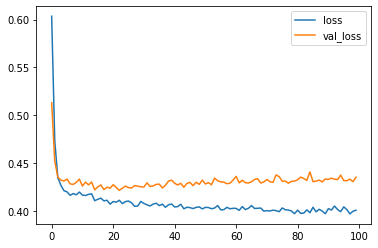

In [40]:
metrics[['loss','val_loss']].plot();

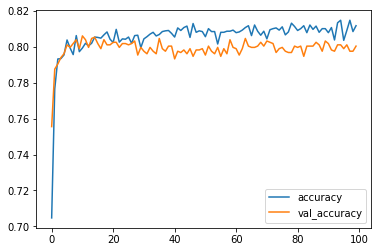

In [41]:
metrics[['accuracy','val_accuracy']].plot();

## Functional API

### Model Definition

In [42]:
df.shape

(7032, 20)

In [43]:
data_in = Input(shape=(38,))
hidden_1 = Dense(10, activation='relu')(data_in)
output_layer = Dense (1, activation='sigmoid')(hidden_1)

In [44]:
model = Model(inputs= data_in, outputs=output_layer)

In [45]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_2 (Dense)             (None, 10)                390       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


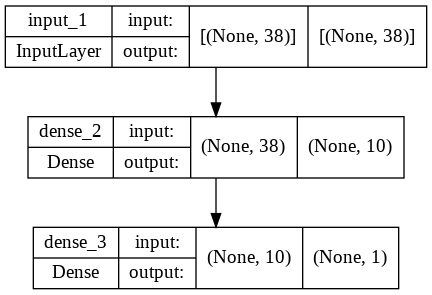

In [46]:
plot_model(model, show_shapes= True)

### Model Training

In [47]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
history_func = model.fit(X_train_trf,y_train, epochs=100, validation_data=(X_val_trf,y_val))

Epoch 1/100
154/154 [==============================] - 1s 3ms/step - loss: 0.6234 - accuracy: 0.6554 - val_loss: 0.5253 - val_accuracy: 0.7406
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7612 - val_loss: 0.4600 - val_accuracy: 0.7797
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7874 - val_loss: 0.4366 - val_accuracy: 0.7989
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7962 - val_loss: 0.4290 - val_accuracy: 0.8038
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8041 - val_loss: 0.4265 - val_accuracy: 0.8003
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8067 - val_loss: 0.4266 - val_accuracy: 0.7982
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8039 - val_loss: 0.4270 - val_accuracy: 0.8010

### Model Evaluation

In [49]:
y_pred =model.predict(X_val_trf)
y_pred = np.where(y_pred<0.5,0,1).squeeze()
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



## Model Improvement using Smote

In [50]:
imba = SMOTE(random_state=21, sampling_strategy = 'minority')

In [51]:
X_train_oversampling, y_train_oversampling = imba.fit_resample(X_train_trf, y_train)

In [52]:
y_train_oversampling.value_counts()

1    3613
0    3613
Name: Churn, dtype: int64

## Sequential API

In [53]:
model_imp_seq = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= (38,), activation= 'relu'),
    keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation= 'sigmoid')     
])

In [54]:
model_imp_seq.compile(optimizer= 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [55]:
history_imp_seq = model_imp_seq.fit(X_train_oversampling, y_train_oversampling, epochs=100, validation_data=(X_val_trf, y_val))

Epoch 1/100
226/226 [==============================] - 2s 5ms/step - loss: 0.5261 - accuracy: 0.7373 - val_loss: 0.5441 - val_accuracy: 0.7349
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7665 - val_loss: 0.5229 - val_accuracy: 0.7456
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 0.4762 - accuracy: 0.7739 - val_loss: 0.5105 - val_accuracy: 0.7441
Epoch 4/100
226/226 [==============================] - 1s 4ms/step - loss: 0.4722 - accuracy: 0.7773 - val_loss: 0.4918 - val_accuracy: 0.7555
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7776 - val_loss: 0.4985 - val_accuracy: 0.7555
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7795 - val_loss: 0.5066 - val_accuracy: 0.7491
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7789 - val_loss: 0.5055 - val_accuracy: 0.7548

In [56]:
metrics_imp = pd.DataFrame(history_imp_seq.history)
metrics_imp.head()

,loss,accuracy,val_loss,val_accuracy
0,0.526146,0.737337,0.544091,0.734897
1,0.485075,0.766537,0.522857,0.745558
2,0.476172,0.773872,0.510503,0.744136
3,0.472168,0.777332,0.491838,0.755508
4,0.473364,0.777609,0.498526,0.755508


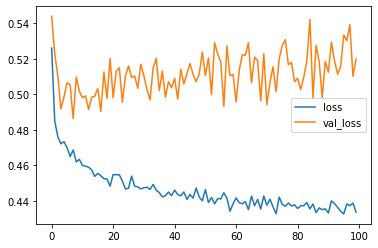

In [57]:
metrics_imp[['loss','val_loss']].plot();

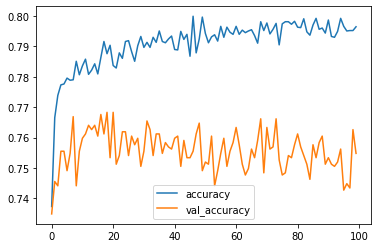

In [58]:
metrics_imp[['accuracy','val_accuracy']].plot();

## Functional API

In [59]:
data_inp = Input(shape=(38,))
hid_lay1 = Dense(64,activation='relu')(data_inp)
hid_lay2 = Dense(32,activation='relu')(hid_lay1)
output = Dense(1,activation='sigmoid')(hid_lay2)

model_func_imp = Model(inputs= data_inp, outputs = output)

model_func_imp.compile(loss = 'binary_crossentropy',
                optimizer= 'adamax',
                metrics=['Recall'])

In [60]:
history_imp_func = model_func_imp.fit(X_train_oversampling, y_train_oversampling, epochs = 100, validation_data=(X_val_trf,y_val))

Epoch 1/100
226/226 [==============================] - 1s 3ms/step - loss: 0.5153 - recall: 0.7883 - val_loss: 0.4907 - val_recall: 0.7406
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.4642 - recall: 0.7999 - val_loss: 0.4843 - val_recall: 0.7326
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 0.4568 - recall: 0.8074 - val_loss: 0.4795 - val_recall: 0.7433
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.4525 - recall: 0.8123 - val_loss: 0.5011 - val_recall: 0.7727
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 0.4485 - recall: 0.8146 - val_loss: 0.4783 - val_recall: 0.7460
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.4449 - recall: 0.8170 - val_loss: 0.4876 - val_recall: 0.7567
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.4423 - recall: 0.8229 - val_loss: 0.4644 - val_recall: 0.7139
Epoch 8/100
226/226 [======

In [61]:
y_pred_test_func = model_func_imp.predict(X_test_trf)
y_pred_test_func = np.where(y_pred_test_func > 0.5, 1 , 0)

# predict X_val_final
y_pred_val_func = model_func_imp.predict(X_val_trf)
y_pred_val_func = np.where(y_pred_val_func > 0.5, 1 , 0)

print('-------------------------Test-------------------------')
print('Classification Reports X_test')
print(classification_report(y_test, y_pred_test_func))
print('----------------------Validation----------------------')
print('Classification Reports X_val')
print(classification_report(y_val, y_pred_val_func))

-------------------------Test-------------------------
Classification Reports X_test
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       517
           1       0.50      0.65      0.56       187

    accuracy                           0.73       704
   macro avg       0.68      0.71      0.69       704
weighted avg       0.76      0.73      0.74       704

----------------------Validation----------------------
Classification Reports X_val
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1033
           1       0.51      0.63      0.56       374

    accuracy                           0.74      1407
   macro avg       0.68      0.71      0.69      1407
weighted avg       0.76      0.74      0.75      1407



Text(0.5, 1.0, 'Functional API Validation')

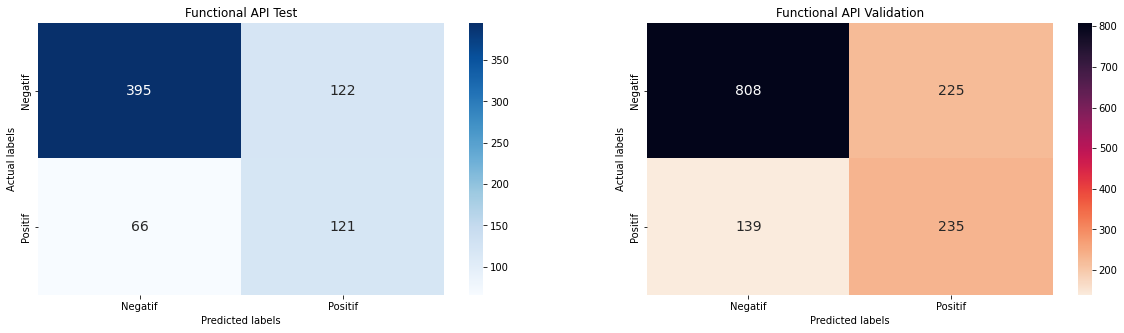

In [71]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
func_test_matrix= confusion_matrix(y_test, y_pred_test_func)
ax = sns.heatmap(func_test_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Functional API Test")

plt.subplot(1,2,2)
func_val_matrix= confusion_matrix(y_val, y_pred_val_func)
ax = sns.heatmap(func_val_matrix, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Functional API Validation")

## Pipe Tensor


### Model Definition

In [73]:
# Pipetensor

# Training data
train_df = tf.data.Dataset.from_tensor_slices((X_train_trf, y_train)).shuffle(10000).batch(20)

# Validation data
val_df = tf.data.Dataset.from_tensor_slices((X_val_trf, y_val)).shuffle(10000).batch(20)

# Test data
test_df = tf.data.Dataset.from_tensor_slices((X_test_trf, y_test)).shuffle(10000).batch(20)

### Model Training

In [78]:
model_pipetensor=model.fit(test_df, epochs=100, validation_data=val_df)

Epoch 1/100
36/36 [==============================] - 0s 13ms/step - loss: 0.3064 - accuracy: 0.8608 - val_loss: 0.5400 - val_accuracy: 0.7584
Epoch 2/100
36/36 [==============================] - 0s 13ms/step - loss: 0.3060 - accuracy: 0.8608 - val_loss: 0.5418 - val_accuracy: 0.7633
Epoch 3/100
36/36 [==============================] - 0s 9ms/step - loss: 0.3054 - accuracy: 0.8580 - val_loss: 0.5404 - val_accuracy: 0.7584
Epoch 4/100
36/36 [==============================] - 0s 9ms/step - loss: 0.3060 - accuracy: 0.8636 - val_loss: 0.5418 - val_accuracy: 0.7612
Epoch 5/100
36/36 [==============================] - 0s 13ms/step - loss: 0.3061 - accuracy: 0.8551 - val_loss: 0.5423 - val_accuracy: 0.7598
Epoch 6/100
36/36 [==============================] - 0s 8ms/step - loss: 0.3075 - accuracy: 0.8480 - val_loss: 0.5437 - val_accuracy: 0.7655
Epoch 7/100
36/36 [==============================] - 0s 8ms/step - loss: 0.3057 - accuracy: 0.8580 - val_loss: 0.5419 - val_accuracy: 0.7612
Epoch 8/10

### Model Evaluation

In [80]:
metrics_pipetensor = pd.DataFrame(model_pipetensor.history)
metrics_pipetensor.head()

,loss,accuracy,val_loss,val_accuracy
0,0.306367,0.860795,0.540031,0.758351
1,0.306008,0.860795,0.541782,0.763326
2,0.305374,0.857955,0.540357,0.758351
3,0.305974,0.863636,0.541847,0.761194
4,0.306127,0.855114,0.542287,0.759773


In [86]:
y_pred_test_pipe = model.predict(test_df)
y_pred_test_pipe = np.where(y_pred_test_pipe > 0.5, 1 , 0)

In [87]:
print('-------------------------Test-------------------------')
print('Classification Reports X_test')
print(classification_report(y_test, y_pred_test_pipe))

-------------------------Test-------------------------
Classification Reports X_test
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       517
           1       0.25      0.23      0.24       187

    accuracy                           0.61       704
   macro avg       0.49      0.49      0.49       704
weighted avg       0.60      0.61      0.61       704



In [88]:
# Save model and pipline for deployment
import pickle
model.save('model.h5')

with open("input_pipeline.pkl", "wb") as f:
    pickle.dump(input_pipeline, f)

# Model Inference

In [91]:
predictions = model.predict(X_test_trf)
predictions[:5]

array([[7.3356479e-02],
       [1.7015088e-07],
       [2.2331178e-03],
       [7.2361231e-02],
       [3.0869097e-01]], dtype=float32)

In [92]:
y_pred = []

for val in predictions:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
            
y_pred[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [93]:
df_true_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}) 
df_true_pred[:10]

,y_test,y_pred
2404,0,0
1035,0,0
649,0,0
6407,0,0
3069,0,0
4745,0,0
6068,1,1
1812,0,0
3867,0,0
6902,0,0


In [95]:
df_true_pred['y_test'].replace({1: 'Yes',0: 'No'},inplace=True)

In [97]:
df_true_pred['y_pred'].replace({1: 'Yes',0: 'No'},inplace=True)

In [98]:
df_true_pred.head(10)

,y_test,y_pred
2404,No,No
1035,No,No
649,No,No
6407,No,No
3069,No,No
4745,No,No
6068,Yes,Yes
1812,No,No
3867,No,No
6902,No,No


In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       517
           1       0.77      0.71      0.74       187

    accuracy                           0.87       704
   macro avg       0.83      0.82      0.82       704
weighted avg       0.86      0.87      0.86       704



From the report we can see that

1. Precision, Recall, and F1 score for 'class 0' is more than 90% and around 70% for 'class 1'
2. The accuracy of the model was about 87% 

# Kesimpulan


## EDA

1. Data yang didapatkan bersifat imbalance dikarenakan terdapat 73 % No dan 27 % yes

2. Jenis kelamin tidak berpengaruh terhadap Churn Ratio

3. Semakin sebentar kontrak yang dilakukan semakin besar juga Churn Ratio nya sehingga bisa menjadi masukan untuk perusahaan agar bisa menambahkan daya tarik untuk customer dengan kontrak yang lebih lama

## Overall

1. Precision, Recall, and F1 score for 'class 0' is more than 90% and around 70% for 'class 1'
2. The accuracy of the model was about 87% 